## Ice Gaming Sales Analysis

## Introduction

The goal of this project is understanding the factors that contribute to a game's success in order to apply strategic planning and marketing initiatives. This project focuses on analyzing comprehensive data from the online store Ice, which sells video games globally. The dataset spans from 1980 to 2016, providing insights into game releases, platform popularity, genre preferences, and the impact of user and critic reviews on sales.

The primary goal of this analysis is to uncover patterns that distinguish successful games from others, thereby enabling Ice to identify potential blockbuster titles and optimize advertising campaigns for the upcoming year, 2017. By using historical sales data and demographic information such as ESRB ratings, this project aims to provide actionable recommendations for maximizing market penetration and revenue growth.

## Initialization

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats

## Load data

In [2]:
#Loading data set 
games_df= pd.read_csv('/datasets/games.csv')

# Display the first few rows of the dataset
games_df.head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Display general information about the dataset
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


This table contains 11 columns containing the data types of `object` and `float64` 
- `Name`: Name of the game 
- `Year_of_Release`: Year the game was released 
- `Genre`: Category the game belongs to 
- `NA_sales`:North American sales in USD million
- `EU_sales`: Sales in Europe in USD million
- `JP_sales`: Sales in Japan in USD million
- `Other_sales`: Sales in otther countries in USD million 
- `Critic_Score`: Max 100
- `User_Score`: Max 10
- `Rating`: ESRB  Entertainment Software Rating Board

Columns `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `Critic_Score`, and `Rating` contain missing values 

### Conclusions

- We successfully loaded the dataset and observed its structure, consisting of 11 columns and various data types.
- We identified missing values in critical columns such as `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, and `rating`.

## Prepare Data

In [4]:
#Convert column names to lower case
games_df.columns= games_df.columns.str.lower()
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# Convert necessary columns to the appropriate data types
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')
games_df['critic_score'] = pd.to_numeric(games_df['critic_score'], errors='coerce')

games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Filling missing values in `year_of_release` column 

In [6]:
# Step 1: Identify rows with missing year_of_release
missing_years = games_df[games_df['year_of_release'].isna()]

# Step 2: Group by 'name' to identify platforms with missing years
grouped_missing_years = missing_years.groupby('name')

for name, group in grouped_missing_years:
    # Get all unique release years for a game name, excluding NaN values
    all_years = games_df[games_df['name'] == name]['year_of_release'].dropna().unique()
    
    # Check if we have exactly one unique release year for the given game name
    if len(all_years) == 1:
        common_year = all_years[0]
        # Fill NaN values in the original DataFrame with the common year
        games_df.loc[(games_df['name'] == name) & (games_df['year_of_release'].isna()), 'year_of_release'] = common_year

# Verify the changes

display(games_df[games_df['name'] == 'Madden NFL 2004'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [7]:
games_df['year_of_release'].isna().sum()

158

After filling in `year_of_release` column with known values there are still 158 missing values. 
   - since 158 makes ups about .95% of the data we will drop the remaining missing values and convert data type to integers

In [8]:
#Drop na and convert to integer
games_df = games_df.dropna(subset=['year_of_release'])
games_df['year_of_release'] = games_df['year_of_release'].astype('int64')

games_df['year_of_release'].dtype

dtype('int64')

Converting `year_of_release`, `user_score`, and `critic_score` to numeric data types to allow for mathmatical operations and prevent potential errors when analysing data. 

Also ensuring that any values that cannot be converted to a numeric type will be set to `NaN`

### Missing Values

In [9]:
#Check for missing values
games_df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8489
user_score         9022
rating             6697
dtype: int64

For columns with missing values, we'll decide whether to fill them or leave them as is.

- `year_of_release`: Missing values could be due to lack of data. We can leave these as NaN.
- `user_score` and `critic_score` : We'll leave these as NaN as well because filling them with arbitrary values could skew the analysis.
- TBD in `user_score`: We'll treat 'TBD' as missing data and replace it with NaN.

In [10]:
#Display missing values in 'name' column 

missing_name = games_df[games_df['name'].isna()]
missing_name


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


The missing values in the `name` and `genre` columns are found in the same row 

We will drop these rows from the data set because they do not seem to contain significant information.


In [11]:
#Drop rows with missing values in 'name' column 

games_df = games_df.dropna(subset=['name'])
games_df['name'].isna().sum()

0

In [12]:
# Replace 'TBD' with NaN in user_score
games_df['user_score'] = games_df['user_score'].replace('tbd', pd.NA)
games_df['user_score'].head()

0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: user_score, dtype: float64

### Sales

In [13]:
# Calculate total sales
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Created a new column containing total sales of each game in all regions combined.

### Duplicates 

In [14]:
# Check for duplicates in the entire dataset
duplicates = games_df.duplicated()
print("Number of duplicate rows in the entire dataset:", duplicates.sum())

# Check for duplicates based on name, year_of_release, and platform
name_year_platform_duplicates = games_df.duplicated(subset=['name', 'year_of_release', 'platform'])
print("Number of duplicates based on name, year_of_release, and platform:", name_year_platform_duplicates.sum())



Number of duplicate rows in the entire dataset: 0
Number of duplicates based on name, year_of_release, and platform: 1


### Conclsions 

- Converted all column names to lowercase for consistency.
- Converted `year_of_release`, `user_score`, and `critic_score` to numeric types, handling errors by setting non-convertible values to `NaN`.
- Filled missing `year_of_release` values where possible by using existing data within the same game name.
- Dropped rows with missing values in `name` and `genre` columns as they contained insufficient information.
- Replaced 'TBD' in the `user_score` column with `NaN` to handle it as missing data.
- Calculated total sales for each game across all regions by summing the regional sales columns.
- Checked for duplicate rows in the entire dataset as well as duplicates based on `name`, `year_of_release` and `platform` specifically

## Data Analysis

### Games Released per Year

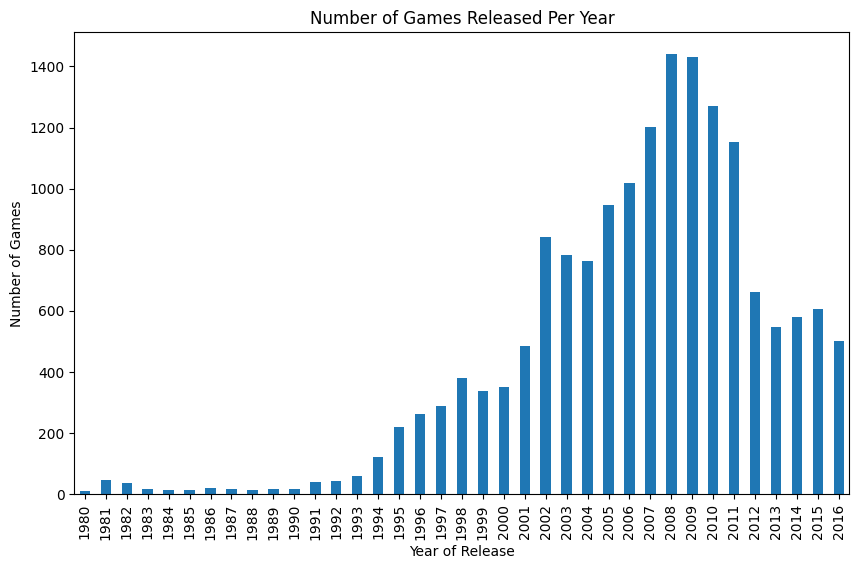

In [15]:
# Number of games released each year
games_per_year = games_df['year_of_release'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
games_per_year.plot(kind='bar')
plt.title('Number of Games Released Per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.show()


<b>Key Observations:<b>

<b>Early Years (1980-1995):<b>

- There are relatively few games released per year during this period.
- This could be due to limited technology and fewer platforms.

<b>Mid-1990s to Early 2000s (1995-2005):<b>

- There is a noticeable increase in the number of games released each year.
- This period likely corresponds to the growth of the gaming industry, with advancements in technology, the popularity of home consoles, and the rise of PC gaming.

<b>Peak Years (2006-2011):<b>

- The number of games released per year peaks during these years, with 2008 and 2009 showing the highest numbers.
- This period corresponds with the rise of major gaming consoles like the PlayStation 3, Xbox 360, and Nintendo Wii, as well as the expansion of the internet.

<b>Decline and Plateau (2012-2016):<b>

- After 2011, there is a noticeable decline in the number of games released per year.
- This decline could be due to various factors, including market saturation, the high cost of game development, and the industry's shift towards fewer but higher-quality releases.
- The data for 2016 might be incomplete, leading to an underrepresentation of releases for that year.

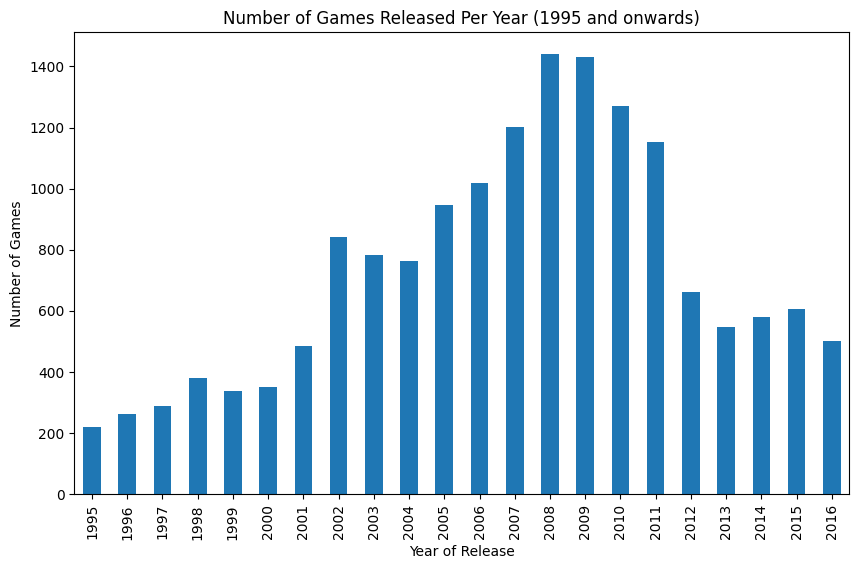

In [16]:
# Filter out years before 1995
filtered_games_df = games_df[games_df['year_of_release'] >= 1995]

# Number of games released each year
filtered_games_per_year = filtered_games_df['year_of_release'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
filtered_games_per_year.plot(kind='bar')
plt.title('Number of Games Released Per Year (1995 and onwards)')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.show()

Due to a limited number of games being released before 1995 we filterd out the data to show the graph from 1995 and onwards

### Sales by Platform

In [17]:
# Total sales by platform
platform_sales = filtered_games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Top platforms by sales
top_platforms = platform_sales.head(10)
top_platforms


platform
PS2     1245.96
X360     966.61
PS3      934.71
Wii      903.31
DS       804.26
PS       721.55
PS4      314.14
GBA      313.73
PSP      292.77
3DS      258.51
Name: total_sales, dtype: float64

<Figure size 1400x800 with 0 Axes>

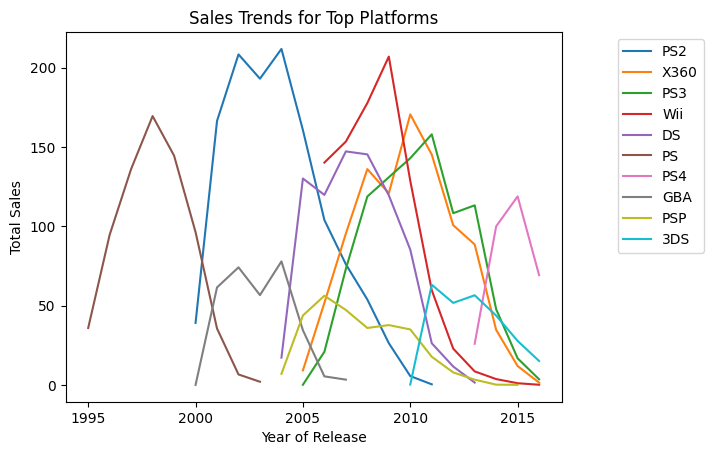

In [18]:
# Sales trends for top platforms over the years
platform_year_sales = filtered_games_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Plot the data 
plt.figure(figsize=(14, 8))
platform_year_sales[top_platforms.index].plot()
plt.title('Sales Trends for Top Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(title='Platform')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()


In [19]:
# Filter data for the top platforms
top_platforms_df = games_df[games_df['platform'].isin(top_platforms.index)]
top_platforms_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01


In [20]:
# Group by platform and year, summing up sales
platform_year_sales = top_platforms_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack(fill_value=0)
platform_year_sales

year_of_release,1985,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
3DS,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.30,63.20,51.76,56.57,43.76,27.78,15.14
DS,0.02,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,147.23,145.36,119.56,85.35,26.33,11.67,1.54,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.07,61.53,74.16,...,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PS,0.00,6.03,35.96,94.7,136.17,169.49,144.53,96.37,35.59,6.67,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PS2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,39.17,166.43,208.36,...,76.10,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00
PS3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,73.19,118.79,130.93,142.96,157.98,108.28,113.25,47.76,16.82,3.60
PS4,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,25.99,100.00,118.90,69.25
PSP,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,47.30,35.96,37.78,35.04,17.82,7.95,3.38,0.24,0.12,0.00
Wii,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,153.41,177.68,206.97,128.67,59.79,22.94,8.59,3.75,1.14,0.18


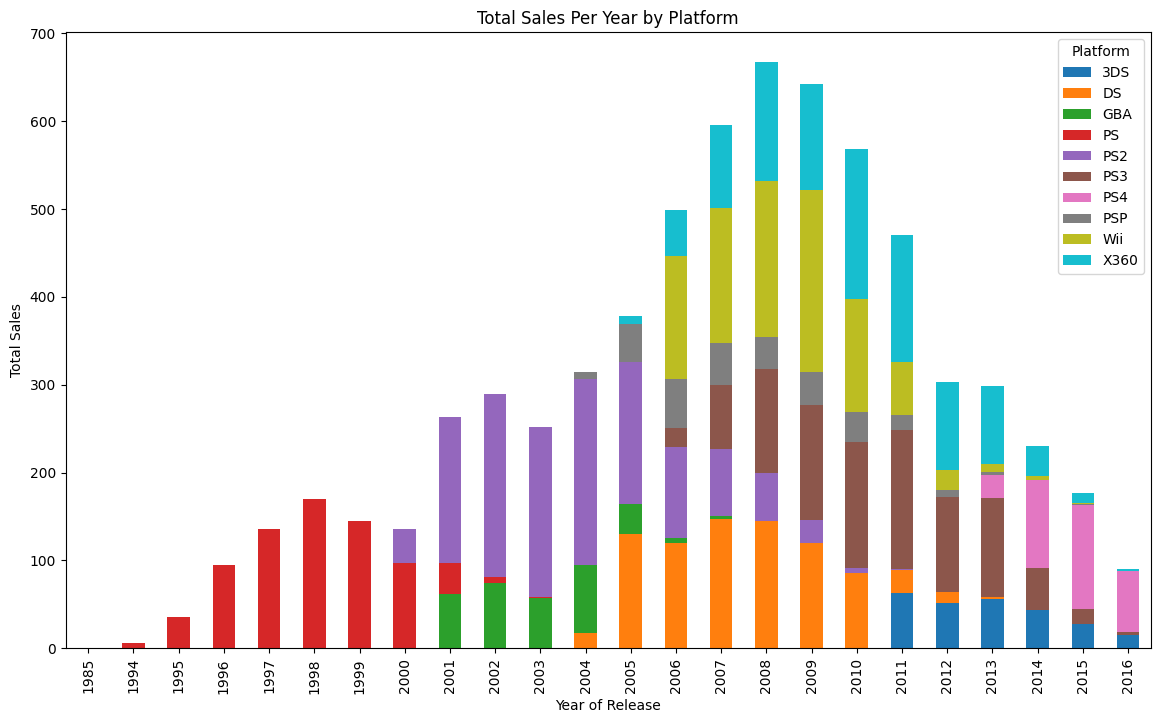

In [21]:
# Plot the data using a stacked bar chart
platform_year_sales.T.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Total Sales Per Year by Platform')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(title='Platform')
plt.show()

From the graphs, we can identify platforms that were popular in the past but now have zero sales. Here are some key observations:

- PS2 (PlayStation 2): Was highly popular from around 2000 to 2010 but has no sales in recent years.
- X360 (Xbox 360): Showed significant sales from around 2005 to 2015 but no sales in the latest years.
- PS3 (PlayStation 3): Popular from around 2006 to 2016 but shows a decline in the later years.
- Wii: Had high sales between 2006 and 2012 but no sales in recent years.
- DS: Popular from 2004 to around 2012 and has since declined.
- PSP: Active from 2005 to around 2011.

Based on the trends, it generally takes around 10-15 years for a platform to appear, peak, and then fade:

- Introduction and Growth: Platforms typically take about 2-5 years to grow from their introduction to their peak popularity.
- Peak Period: Platforms generally enjoy peak sales for around 3-5 years.
- Decline: The decline phase can last around 5-10 years as newer platforms replace older ones.

### Relevant Data Period for Pattern Analysis

To build a model for predicting game success in 2017, we want to use the most recent information due to the dynamic evolution of the gaming industry. Based on the observations, data from 2012 to 2016 would be most relevant, as it covers the time frame in which the market stablizes and most likley includes recent trends that could impact 2017.

In [22]:
# Focus on data from the most relevant years
relevant_years = games_df[(games_df['year_of_release'] >= 2012) & (games_df['year_of_release'] <= 2016)]
relevant_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


<Figure size 1400x800 with 0 Axes>

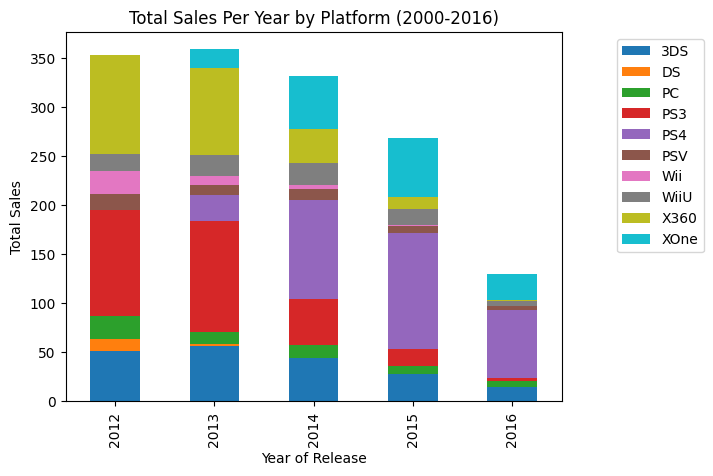

In [23]:
# Calculate total sales for each platform in relevant years
relevant_platform_sales = relevant_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Select the top platforms
relevant_top_platforms = relevant_platform_sales.head(10).index

# Filter data for the top platforms
relevant_top_platforms_df = relevant_years[relevant_years['platform'].isin(relevant_top_platforms)]

# Group by platform and year, summing up sales
relevant_platform_year_sales = relevant_top_platforms_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack(fill_value=0)

# Plot the data using a stacked bar chart
plt.figure(figsize=(14, 8))
relevant_platform_year_sales.T.plot(kind='bar', stacked=True)
plt.title('Total Sales Per Year by Platform (2000-2016)')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend(title='Platform')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()


<b>Next-Gen Consoles: 
- PS4 and Xbox One showed strong sales growth after their release, indicating a shift in consumer preference towards next-gen consoles.

<b> Obsolescence of Older Platforms:
- Platforms like DS, PSP, and Wii experienced a steep decline, suggesting they were becoming obsolete.

<b>PC Gaming Stability: 
- PC gaming sales remained relatively stable, indicating a consistent demand for PC games despite fluctuations in other platforms.

    Overall, all platforms are showing a gradual decline throughout out the time of 2012 to 2016. Possibly due to the gaming industry coming to  stabalizing after intial exponential growth. As well as games putting more focus on in game purchases rather than direct sale revenue. 
    
    This analysis suggests that strategic planning and marketing initiatives should focus on next-gen consoles like PS4 and Xbox One while considering the consistent demand for PC games.

In [24]:
# Reviewer's code

relevant_years.query('year_of_release>2011').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.76,11.67,23.45,108.28,NaN,7.95,16.19,22.94,17.56,100.72,NaN
2013,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<Figure size 1200x800 with 0 Axes>

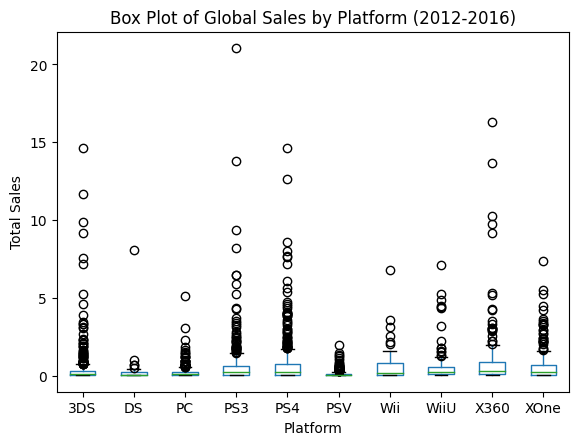

In [25]:
# Create a box plot for global sales broken down by platform
plt.figure(figsize=(12, 8))
relevant_top_platforms_df.boxplot(column='total_sales', by='platform', grid=False)
plt.title('Box Plot of Global Sales by Platform (2012-2016)')
plt.suptitle('')  # Suppress the default title to make it cleaner
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

Due to the outliers in the data our box plot is not readable. 
- We will adjust the max value of the y axis to make the box plot readable and preserve the outliers 

<Figure size 1400x1000 with 0 Axes>

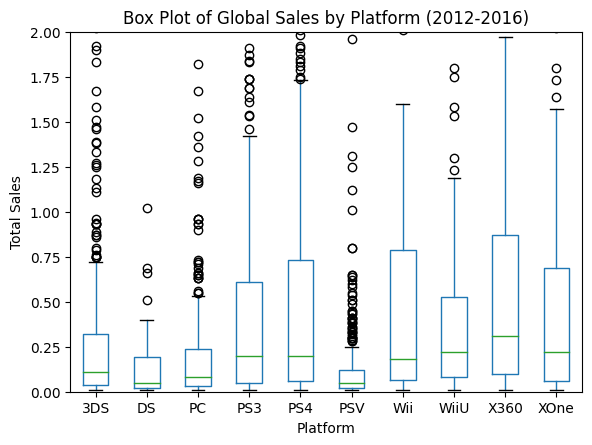

In [26]:
# Create a box plot for global sales broken down by platform adjusting y axis
plt.figure(figsize=(14, 10))
relevant_top_platforms_df.boxplot(column='total_sales', by='platform', grid=False)
plt.title('Box Plot of Global Sales by Platform (2012-2016)')
plt.suptitle('')  # Suppress the default title to make it cleaner
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.ylim(0,2)
plt.show()

<b>Range of Sales: 
- Platforms like PS3, PS4, Wii, X360, and XOne show a wide range of total sales, indicating significant variability in game performance on these platforms. This suggests that while some games on these platforms achieve very high sales, others do not.
Platforms like 3DS, DS, PC, PSV, and WiiU have a narrower range of sales, implying more consistent performance but with generally lower sales figures.

<b>Outliers: 
- All platforms have outliers, which are games that have exceptionally high sales compared to the majority of games on the same platform.
The presence of many outliers in platforms like PS3, PS4, and Wii indicates that these platforms had several blockbuster titles during this period.

<b>Platform comparison:
- PS4 and X360 appear to have the highest overall sales figures, with the top whisker extending further compared to other platforms, suggesting that these platforms were particularly successful during this period.
PS3, PS4, and X360 not only have higher median sales but also a substantial number of outliers, indicating both a higher base level of success and some very high-selling games.

<b> Low Sales Platforms:
- Platforms like DS, PSV, and WiiU have lower median sales and fewer outliers, indicating that these platforms had fewer high-selling games and generally lower overall sales performance.

#### Reviews

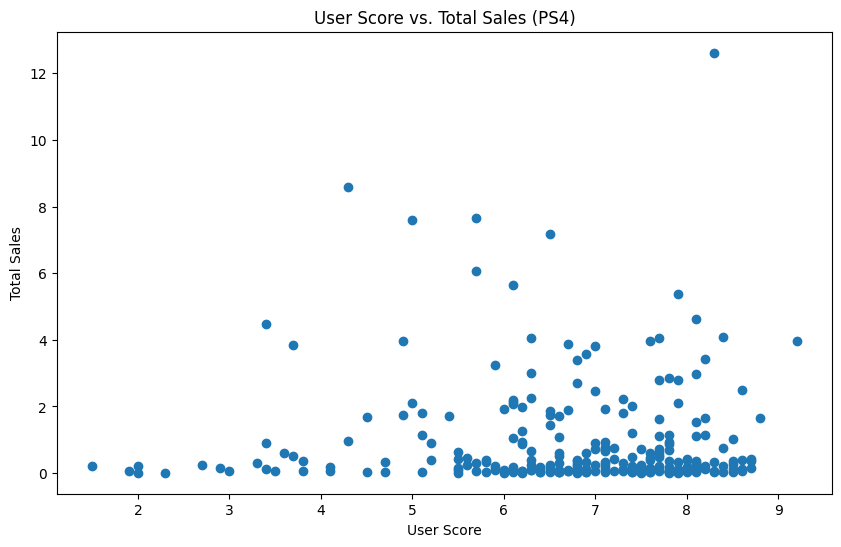

In [27]:
# Choose a popular platform, e.g., PS4
popular_platform = 'PS4'
platform_data = relevant_years[relevant_years['platform'] == popular_platform]

# Scatter plot for user reviews
plt.figure(figsize=(10, 6))
plt.scatter(platform_data['user_score'], platform_data['total_sales'])
plt.title('User Score vs. Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.show()

In [28]:
# Correlation coefficient for user reviews
user_corr = platform_data[['user_score', 'total_sales']].corr().iloc[0, 1]
user_corr

-0.03195711020455685

- The correlation coefficient is very close to 0, indicating almost no linear relationship between user scores and total sales.
- A slightly negative value suggests a minimal inverse relationship, but it is so close to zero that it is effectively negligible.
- This implies that user reviews do not significantly impact total sales of games.

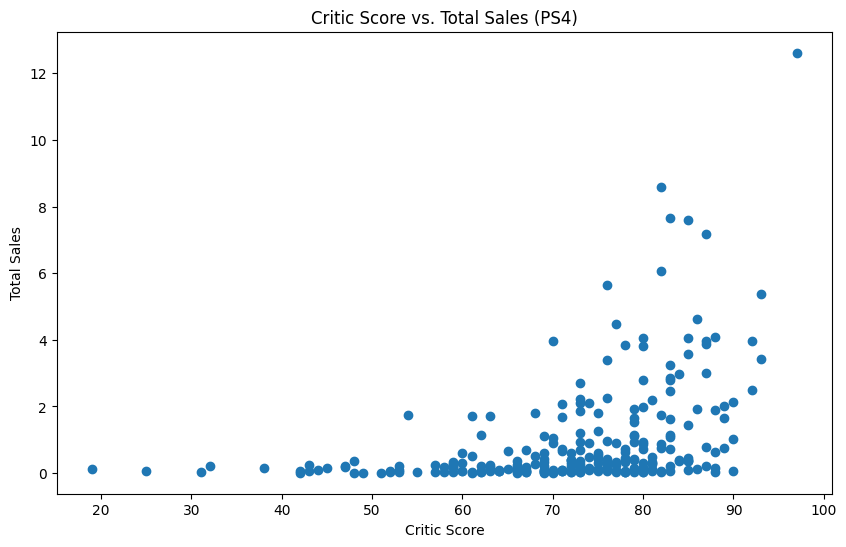

In [29]:
# Scatter plot for critic reviews
plt.figure(figsize=(10, 6))
plt.scatter(platform_data['critic_score'], platform_data['total_sales'])
plt.title('Critic Score vs. Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.show()

In [30]:
# Correlation coefficient for critic reviews
critic_corr = platform_data[['critic_score', 'total_sales']].corr().iloc[0, 1]
critic_corr

0.40656790206178123

- The correlation coefficient is moderate and positive, indicating a noticeable linear relationship between critic scores and total sales.
- A value of approximately 0.41 suggests that higher critic scores tend to be associated with higher total sales, but the relationship is not very strong.
- This implies that while critic reviews have some influence on total sales, other factors also play a significant role.

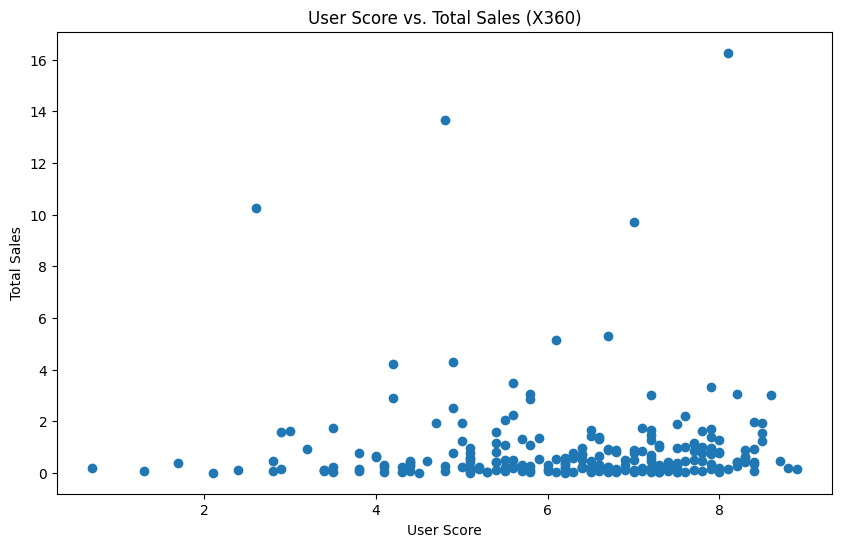

In [31]:
# Compare sales for the same games on different platforms (X360)
same_games = relevant_years[relevant_years['platform'] == 'X360']

# Scatter plot for user score vs. total sales on Xbox 360
plt.figure(figsize=(10, 6))
plt.scatter(same_games['user_score'], same_games['total_sales'])
plt.title('User Score vs. Total Sales (X360)')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.show()


In [32]:
# Correlation coefficient for user reviews
user_corr = same_games[['user_score', 'total_sales']].corr().iloc[0, 1]
user_corr

0.006314938203566579

- The correlation coefficient is very close to zero indicating no relationship between user reviews and total sales on X360

- This implies that user reviews dont play a significant role in total sales

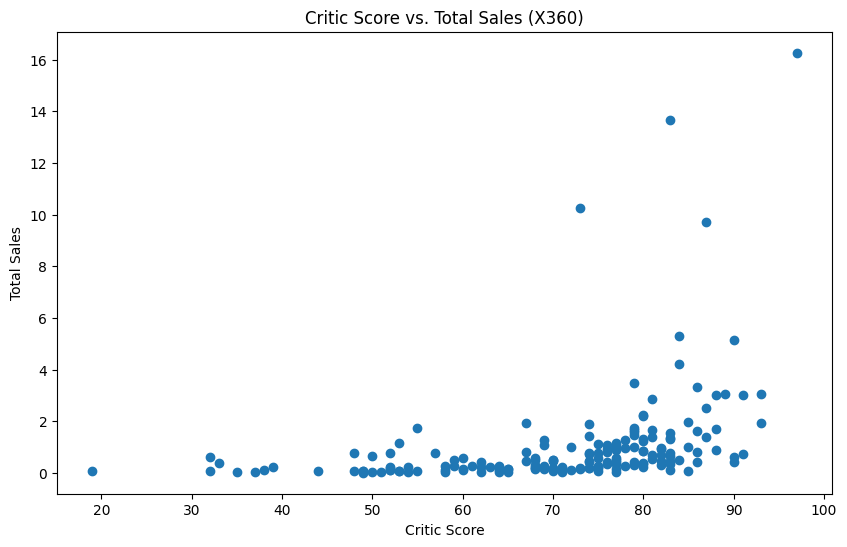

In [33]:
# Scatter plot and correlation for critic reviews
plt.figure(figsize=(10, 6))
plt.scatter(same_games['critic_score'], same_games['total_sales'])
plt.title('Critic Score vs. Total Sales (X360)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.show()

In [34]:
# Correlation coefficient for critic reviews
critic_corr = same_games[['critic_score', 'total_sales']].corr().iloc[0, 1]
critic_corr

0.3602659026138047

- The correlation coefficient is moderate and positive, indicating a noticeable linear relationship between critic scores and total sales.
- A value of approximately 0.36 suggests that higher critic scores tend to be associated with higher total sales, but the relationship is not very strong.
- This implies that while critic reviews have some influence on total sales, while other factors also play a significant role.

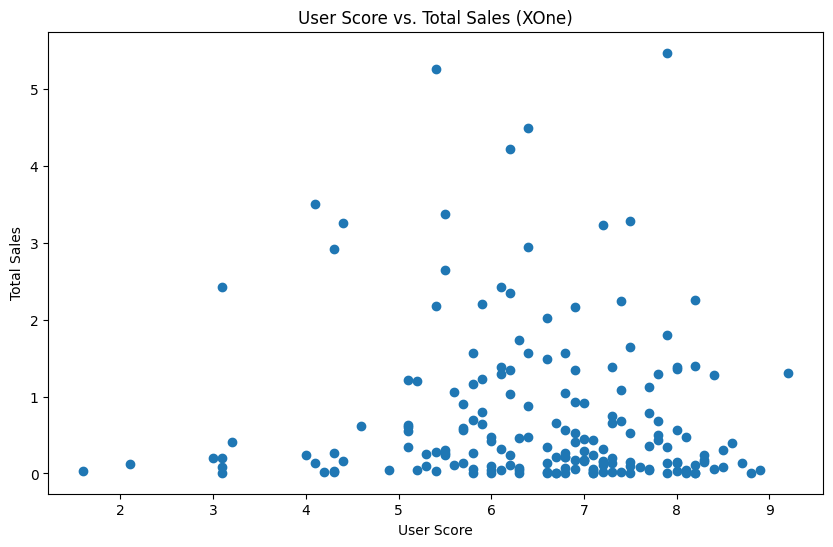

In [35]:
# Compare sales for the same games on different platforms (XOne)
same_games_xone = relevant_years[relevant_years['platform'] == 'XOne']

# Scatter plot for user score vs. total sales on Xbox One
plt.figure(figsize=(10, 6))
plt.scatter(same_games_xone['user_score'], same_games_xone['total_sales'])
plt.title('User Score vs. Total Sales (XOne)')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.show()

In [36]:
# Correlation coefficient for user reviews
user_corr = same_games_xone[['user_score', 'total_sales']].corr().iloc[0, 1]
user_corr

-0.06892505328279543

- The correlation coefficient is very close to 0, indicating almost no linear relationship between user scores and total sales.
- A slightly negative value suggests a minimal inverse relationship, but it is so close to zero that it is effectively negligible.
- This implies that user reviews do not significantly impact total sales of games.

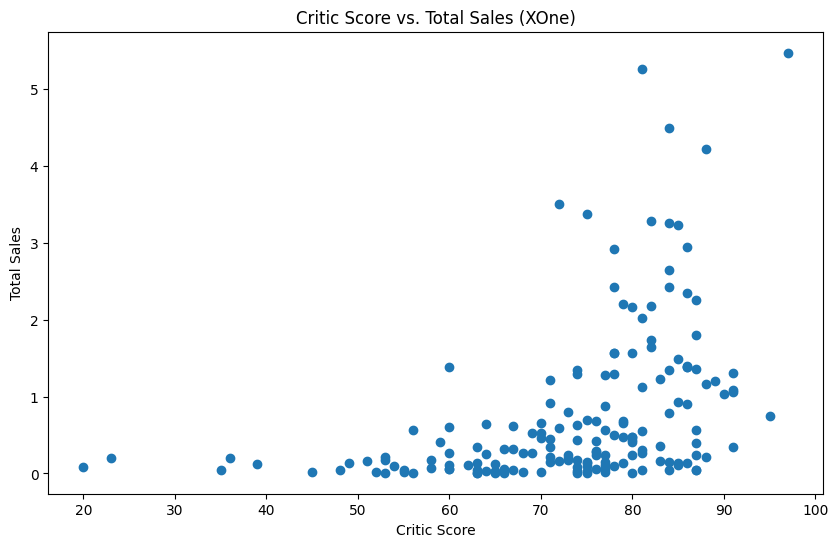

In [37]:
# Scatter plot and correlation for critic reviews
plt.figure(figsize=(10, 6))
plt.scatter(same_games_xone['critic_score'], same_games_xone['total_sales'])
plt.title('Critic Score vs. Total Sales (XOne)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.show()

In [38]:
# Correlation coefficient for critic reviews
user_corr = same_games_xone[['critic_score', 'total_sales']].corr().iloc[0, 1]
user_corr

0.4169983280084021

- The correlation coefficient is moderate and positive, indicating a noticeable linear relationship between critic scores and total sales.
- A value of approximately 0.36 suggests that higher critic scores tend to be associated with higher total sales, but the relationship is not very strong.
- This implies that while critic reviews have some influence on total sales, while other factors also play a significant role.

<b>In Summary: 

<b> User Reviews: 
- The correlation coefficient suggests that user reviews have almost no impact on the total sales of games. This could be due to various reasons such as the difference in how user reviews are perceived or the variability in user opinions.

<b>Critic Reviews: 
- The moderate positive correlation indicates that critic reviews have a more substantial influence on total sales compared to user reviews. Games that receive higher critic scores tend to sell better, though the relationship is not strong enough to be the sole predictor of sales.
    
It may be a good idea to consider placing more emphasis on achieving good critic reviews, as they have a more noticeable impact on sales. However, we should not ignore user reviews completely, as other factors (like word of mouth) could still influence sales.

#### Games by Genere

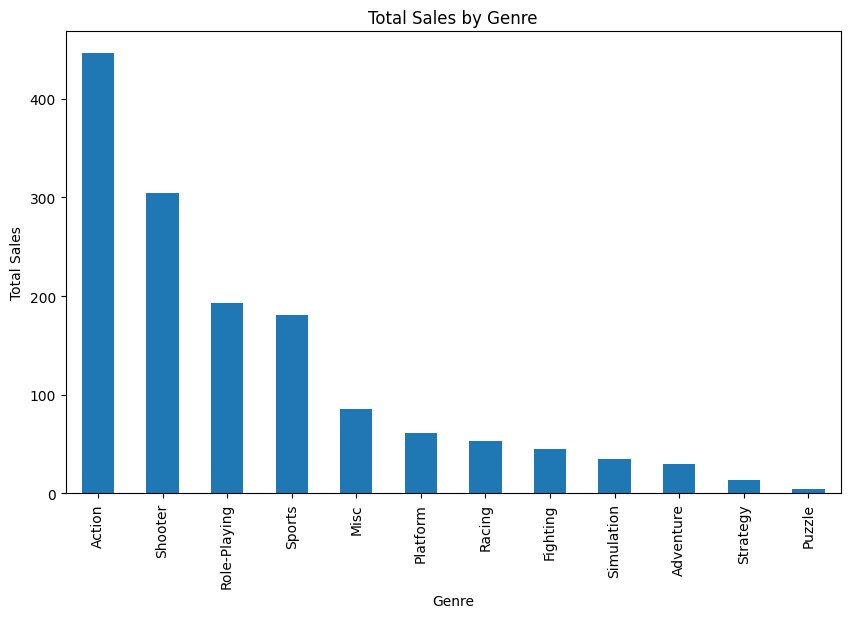

genre
Action          446.06
Shooter         304.75
Role-Playing    192.80
Sports          181.07
Misc             85.28
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64

In [39]:
# Total sales by genre
genre_sales = relevant_years.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.show()

# Describe the most profitable genres
genre_sales


<b>Popular Genres: 

- Action, Sports, Shooter, and Role-Playing genres are the top performers in terms of sales. These genres likely have broad appeal, engaging gameplay, and strong market demand.
    
<b> Low Sales Genres:

- Fighting, Adventure, Puzzle, Strategy: These genres have the lowest total sales. This could be due to niche markets, less frequent releases, or less widespread appeal.

##### Average Sales per Game: 
This will show the average performance of games within each genre.

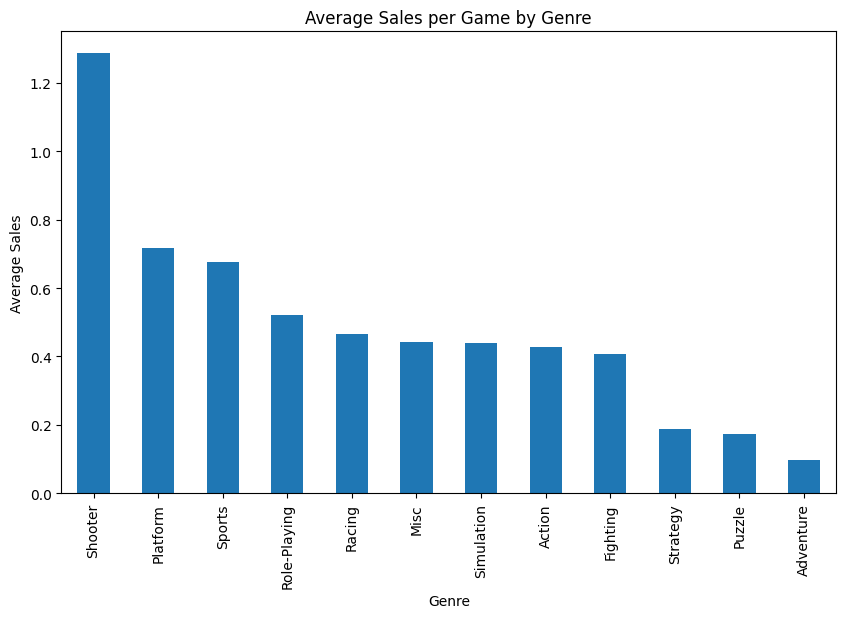

genre
Shooter         1.285865
Platform        0.717647
Sports          0.675634
Role-Playing    0.521081
Racing          0.465217
Misc            0.441865
Simulation      0.439000
Action          0.428904
Fighting        0.408165
Strategy        0.187887
Puzzle          0.174643
Adventure       0.097450
Name: total_sales, dtype: float64

In [40]:
# Calculate the average sales per game for each genre
average_sales_per_game = relevant_years.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
average_sales_per_game.plot(kind='bar')
plt.title('Average Sales per Game by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sales')
plt.show()

# Display the average sales per game
average_sales_per_game


##### Median Sales per Game
This will help understand the typical performance of games within each genre, reducing the impact of outliers.

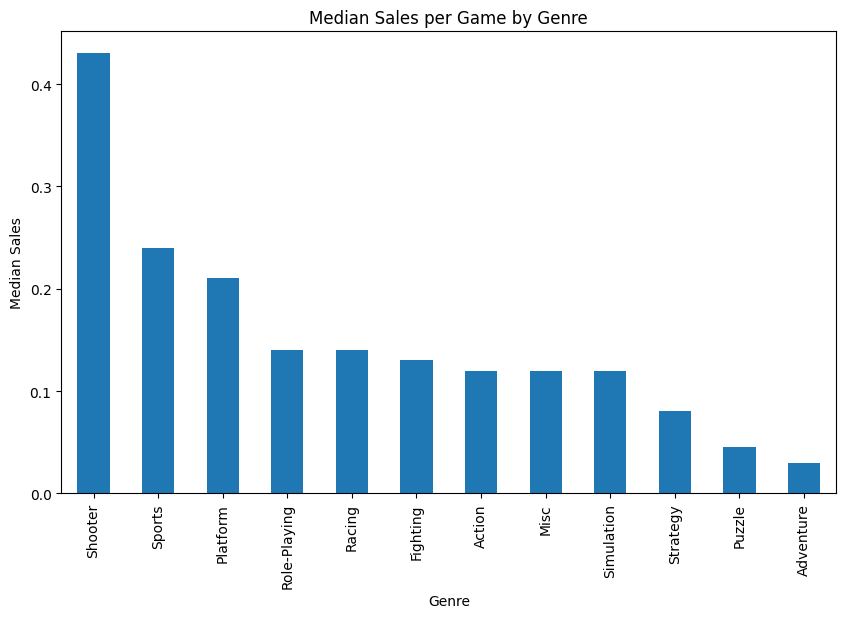

genre
Shooter         0.430
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

In [41]:
# Calculate the median sales per game for each genre
median_sales_per_game = relevant_years.groupby('genre')['total_sales'].median().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
median_sales_per_game.plot(kind='bar')
plt.title('Median Sales per Game by Genre')
plt.xlabel('Genre')
plt.ylabel('Median Sales')
plt.show()

# Display the median sales per game
median_sales_per_game


<b> In Summary: 
    
While the Action genre has high total sales, the average and median sales per game reveal that Shooter, Sports, and Platform genres are more successful on a per-game basis. This suggests that despite the number of games, these genres consistently perform better in terms of sales per game.

#### Games by Region

In [42]:
# Function to get top platforms and genres for a region
def top_platforms_genres(region_sales, top_n=5):
    top_platforms = relevant_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(top_n)
    top_genres = relevant_years.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(top_n)
    return top_platforms, top_genres

# Top platforms and genres for NA, EU, JP
na_sales = relevant_years[['platform', 'genre', 'na_sales']]
eu_sales = relevant_years[['platform', 'genre', 'eu_sales']]
jp_sales = relevant_years[['platform', 'genre', 'jp_sales']]

na_top_platforms, na_top_genres = top_platforms_genres(na_sales)
eu_top_platforms, eu_top_genres = top_platforms_genres(eu_sales)
jp_top_platforms, jp_top_genres = top_platforms_genres(jp_sales)

# Function to display results nicely
def display_top_platforms_genres(region, top_platforms, top_genres):
    print(f"Top Platforms and Genres in {region}\n")
    print("Top Platforms:")
    print(top_platforms)
    print("\nTop Genres:")
    print(top_genres)
    print("\n" + "="*50 + "\n")

# Display the results
display_top_platforms_genres("North America", na_top_platforms, na_top_genres)
display_top_platforms_genres("Europe", eu_top_platforms, eu_top_genres)
display_top_platforms_genres("Japan", jp_top_platforms, jp_top_genres)

Top Platforms and Genres in North America

Top Platforms:
platform
PS4     314.14
PS3     289.71
X360    237.52
3DS     195.01
XOne    159.32
Name: total_sales, dtype: float64

Top Genres:
genre
Action          446.06
Shooter         304.75
Role-Playing    192.80
Sports          181.07
Misc             85.28
Name: total_sales, dtype: float64


Top Platforms and Genres in Europe

Top Platforms:
platform
PS4     314.14
PS3     289.71
X360    237.52
3DS     195.01
XOne    159.32
Name: total_sales, dtype: float64

Top Genres:
genre
Action          446.06
Shooter         304.75
Role-Playing    192.80
Sports          181.07
Misc             85.28
Name: total_sales, dtype: float64


Top Platforms and Genres in Japan

Top Platforms:
platform
PS4     314.14
PS3     289.71
X360    237.52
3DS     195.01
XOne    159.32
Name: total_sales, dtype: float64

Top Genres:
genre
Action          446.06
Shooter         304.75
Role-Playing    192.80
Sports          181.07
Misc             85.28
Name: total_s

<b> Key Observations: 
    
- The PS4 and PS3 platforms are leading in sales across North America, Europe, and Japan during 2012-2016. This indicates the strong market presence and popularity of PlayStation consoles.
- The Xbox 360 and Xbox One platforms are consistently among the top platforms in North America and Europe, showcasing their significant impact in these regions.
- The 3DS also ranks high in sales across all three regions, reflecting its popularity as a portable gaming console.
- Action games are the most popular genre in all regions, indicating a universal preference for this genre. This suggests that action games have a broad appeal and can be a focus for game developers and marketers.
- Shooter and Role-Playing games are also highly popular across all regions, demonstrating their broad appeal.
- Sports games hold a strong position in all regions, particularly in North America and Europe.
    
    The findings indicate that certain platforms and genres have universal appeal across North America, Europe, and Japan. The PlayStation 4, Xbox 360, PlayStation and 3DS are top platforms in all regions, demonstrating their global market penetration.
Action, Sports, and Shooter genres are consistently popular, suggesting that these types of games have widespread acceptance and can drive sales in multiple markets.

In [43]:
# Sales by ESRB rating for each region
esrb_sales_na = relevant_years.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = relevant_years.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = relevant_years.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

esrb_sales_na, esrb_sales_eu, esrb_sales_jp


(rating
 M       231.61
 E       114.37
 E10+     77.93
 T        66.02
 Name: na_sales, dtype: float64,
 rating
 M       194.19
 E       113.03
 E10+     57.25
 T        52.96
 Name: eu_sales, dtype: float64,
 rating
 E       28.33
 T       26.02
 M       21.20
 E10+     8.19
 Name: jp_sales, dtype: float64)

<b>Key Observations:
    
North America and Europe:

- The "M" (Mature) rating is the top-selling ESRB rating, followed by "E" (Everyone). This suggests a significant market for mature-rated games in these regions.
- The "E10+" (Everyone 10+) and "T" (Teen) ratings also have substantial sales, indicating a diverse audience.
    
Japan:

- The "E" (Everyone) rating is the top-selling ESRB rating, followed closely by "T" (Teen). This reflects a preference for games suitable for all ages and teens.
- The "M" (Mature) rating is less popular compared to North America and Europe, coming in third after "T" (Teen).

    Stocking a diverse range of "M" and "E" rated games to meet the majority of consumer demands, with a careful selection of "T" rated titles would be beneficial.

### Testing Hypothesis 

#### Hypothesis 1: Average User Ratings of Xbox One and PC are the Same
Null Hypothesis (H0): The average user ratings of Xbox One and PC are the same.

Alternative Hypothesis (H1): The average user ratings of Xbox One and PC are different.

Significance level: By choosing a significance level of 0.05, we adhere to standard practices in hypothesis testing and make clear interpretations based on the statistical evidence provided by the tests.
   
   The hypothesis test has a statistical power of 95%, which is typically considered adequate for most research studies.

In [44]:
# Filter data for Xbox One and PC platforms
xbox_one_ratings = relevant_years[relevant_years['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = relevant_years[relevant_years['platform'] == 'PC']['user_score'].dropna()

# Perform t-test
t_stat, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings)

t_stat, p_value


(0.5517051465777201, 0.5814663562474292)

Since the p-value (0.5815) is greater than the significance level of 0.05, we fail to reject the null hypothesis (H0).
There is not enough evidence to conclude that the average user ratings of Xbox One and PC are different..


#### Hypothesis 2: Average User Ratings for Action and Sports Genres
Null Hypothesis (H0): The average user ratings for Action and Sports genres are the same.

Alternative Hypothesis (H1): The average user ratings for Action and Sports genres are different.

In [45]:
# Filter data for Action and Sports genres
action_ratings = relevant_years[relevant_years['genre'] == 'Action']['user_score'].dropna()
sports_ratings = relevant_years[relevant_years['genre'] == 'Sports']['user_score'].dropna()

# Perform t-test
t_stat_genre, p_value_genre = stats.ttest_ind(action_ratings, sports_ratings)

t_stat_genre, p_value_genre


(11.103392006445583, 1.4731545924852822e-26)

Since the p-value (1.473e-26) is much smaller than the significance level of 0.05, we reject the null hypothesis (H0).
There is significant evidence to suggest that the average user ratings for Action and Sports genres are different.

# Conculsion

In conclusion, the analysis of Ice's video game sales data from 2016 has yielded several key insights that are useful in shaping strategic decisions for the future. Through data preparation, exploration, and analysis, we identified trends in game releases, platform preferences, and genre popularity across different regions. The examination of user and critic reviews has highlighted the impact of critic reviews over user reviews on game sales, emphasizing the importance of quality and perception.

Key findings include the dominance of specific platforms in different regions, the varying popularity of genres, and the nuanced effects of ESRB ratings on sales across markets. Hypothesis testing further validated differences in user ratings between platforms and genres, providing statistical evidence to guide targeted marketing strategies.

Moving forward, Ice can capitalize on these insights by focusing on platforms with high sales potential, tailoring game selections to regional preferences, and emphasizing quality assurance and marketing efforts aligned with user expectations. 